In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
lm = LinearRegression()

In [3]:
df = pd.read_excel("pib.xlsx")

In [4]:
df.head()

,year,pib_brasil,crescimento_pib_brasil,exportacao,crescimento_exportacao,importacao,crescimento_importacao,comercio_total,crescimento_comercio_total,pib_mundo,crescimento_pib_mundo,dummy_crise_2009
0,1995,"$1.374.313,50",0.1619,"$97.410,32",0.0092,124120.8974,0.3233,"$221.531,22",0.1640,3.087129e+13,0.110478,0
1,1996,"$1.649.704,00",0.2004,"$96.627,66",-0.0080,129855.9899,0.0462,"$226.483,65",0.0224,3.155459e+13,0.022134,0
2,1997,"$1.599.565,38",-0.0304,"$107.762,02",0.1152,149353.6088,0.1501,"$257.115,63",0.1353,3.143964e+13,-0.003643,0
3,1998,"$1.532.996,00",-0.0416,"$111.911,53",0.0385,148179.6836,-0.0079,"$260.091,21",0.0116,3.137824e+13,-0.001953,0
4,1999,"$1.481.144,63",-0.0338,"$108.029,72",-0.0347,124453.4133,-0.1601,"$232.483,14",-0.1061,3.254268e+13,0.037110,0


In [5]:
df.drop(columns = ['importacao','exportacao','pib_mundo'], inplace= True)
df.describe()

,year,crescimento_pib_brasil,crescimento_exportacao,crescimento_importacao,crescimento_comercio_total,crescimento_pib_mundo,dummy_crise_2009
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2006.00000,0.041878,0.064530,0.070735,0.066509,0.048925,0.043478
std,6.78233,0.071202,0.106873,0.156180,0.123990,0.054385,0.208514
min,1995.00000,-0.042400,-0.151400,-0.170500,-0.143600,-0.053991,0.000000
25%,2000.50000,-0.004000,-0.020350,-0.025050,-0.030050,0.018492,0.000000
50%,2006.00000,0.014300,0.063200,0.064000,0.053800,0.037110,0.000000
75%,2011.50000,0.101950,0.134150,0.180350,0.171550,0.096054,0.000000
max,2017.00000,0.200400,0.268500,0.346600,0.308400,0.126730,1.000000


In [6]:
df.corr()

,year,crescimento_pib_brasil,crescimento_exportacao,crescimento_importacao,crescimento_comercio_total,crescimento_pib_mundo,dummy_crise_2009
year,1.000000,-0.171252,-0.144871,-0.206382,-0.192301,-0.080726,0.096424
crescimento_pib_brasil,-0.171252,1.000000,0.326049,0.665154,0.566216,0.546434,-0.011261
crescimento_exportacao,-0.144871,0.326049,1.000000,0.732477,0.898771,0.619496,-0.440442
crescimento_importacao,-0.206382,0.665154,0.732477,1.000000,0.956299,0.646177,-0.288694
crescimento_comercio_total,-0.192301,0.566216,0.898771,0.956299,1.000000,0.677614,-0.369401
crescimento_pib_mundo,-0.080726,0.546434,0.619496,0.646177,0.677614,1.000000,-0.402627
dummy_crise_2009,0.096424,-0.011261,-0.440442,-0.288694,-0.369401,-0.402627,1.000000


In [7]:
x = df[['crescimento_pib_brasil','crescimento_pib_mundo','dummy_crise_2009']]
y = df['crescimento_comercio_total']

In [8]:
lm.fit(x,y)
lm.score(x,y)
yhat1 = lm.predict(x)

In [9]:
lm.score(x,y)

0.544824683554267

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y,df['crescimento_pib_brasil'])
print(p_value)

0.004854832486906787


In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y,df['crescimento_pib_mundo'])
print(p_value)

0.0003817737949492214


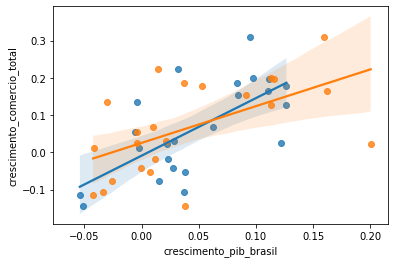

In [17]:
ax1 = sns.regplot(df['crescimento_pib_mundo'],y)
ax1 = sns.regplot(df['crescimento_pib_brasil'],y)

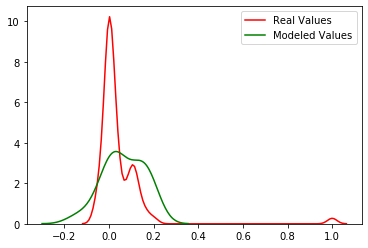

In [14]:
ax1 = sns.distplot(x, hist = False, color = 'r', label = 'Real Values')
sns.distplot(yhat1, hist = False, color = 'g', label = 'Modeled Values', ax = ax1)

In [15]:
brasil = [-5.5, -5.3, -5, -4, -3.3, -3]
#FMI, Economist Intelligence Unit, 
mundo = [-3, -2.5]

meanbr = 0
meanwor = 0

for n in brasil:
    meanbr=meanbr+n
meanbr=meanbr/len(brasil)

for n in mundo:
    meanwor=meanwor+n
meanwor=meanwor/len(mundo)


m= np.array([[meanbr,meanwor,1]])

In [16]:
yhat2=lm.predict(m)
yhat2

array([-5.26775508])